In [4]:
!python exp_run_time.py

/home/takagi/workspace/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:279: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)
/home/takagi/workspace/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:279: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)
/home/takagi/workspace/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:279: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making 

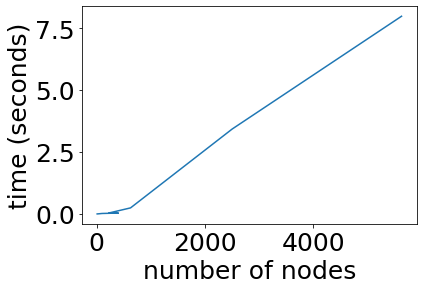

In [13]:
import joblib
import os
import re
import numpy as np

pat = re.compile("optimize_score_n_nodes_(\d*).jbl")
filenames = !ls results/optimize_synthetic
times = []
pre_pcs = []
opt_pcs = []
for filename in filenames:
    n_nodes = int(pat.match(filename).group(1))
    results = joblib.load(os.path.join("results", "optimize_synthetic",filename))
    times.append((n_nodes, results[0]))
    pre_pcs.append((n_nodes, results[1]["optimal_PC"]))
    opt_pcs.append((n_nodes, results[2]["optimal_PC"]))
times = np.array(times)
pre_pcs = np.array(pre_pcs)
opt_pcs = np.array(opt_pcs)

sort_ind = np.argsort(times[:,1])
times = times[sort_ind]
pre_pcs = pre_pcs[sort_ind]
opt_pcs = opt_pcs[sort_ind]

import matplotlib.pyplot as plt
plt.plot(times[:,0], times[:,1])
plt.xlabel("number of nodes")
plt.ylabel("time (seconds)")
plt.rcParams["font.size"] = 25

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


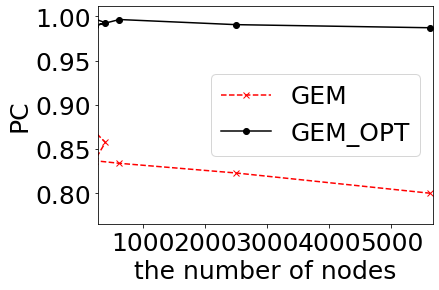

In [14]:
import matplotlib.pyplot as plt
plt.plot(pre_pcs[:,0], pre_pcs[:,1], color="red", label="GEM", marker="x", linestyle="dashed")
plt.plot(opt_pcs[:,0], opt_pcs[:,1], color="black", label="GEM_OPT", marker="o")
plt.xlabel("the number of nodes")
plt.ylabel("PC")
plt.xlim(280, 5665)
plt.legend()
plt.rcParams["font.size"] = 18
plt.savefig("opt_PC.eps", bbox_inches='tight', pad_inches=0)